# Data Import and Background Analysis

In [149]:
# Loading all libraries which are required for all tasks
import pandas as pd # To load and analyse dataset
import matplotlib.pyplot as plt # To draw graph
import seaborn as sns # To draw colorful graph
import numpy as np
from scipy.stats import norm # For normal distribution
from scipy.stats import chi2_contingency # For p-value and chi-square

In [150]:
df = pd.read_csv("Donnée .csv") # Reading from DataFrame

In [151]:
df.head() # Displaying first few lines

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


#### How many lines does the dataframe consist of?

In [152]:
num_lines = df.shape[0]
print("Number of lines in the dataframe:", num_lines)

Number of lines in the dataframe: 801


#### How many variables make up the dataframe?

In [153]:
num_variables = df.shape[1]
print("Number of variables in the dataframe:", num_variables)

Number of variables in the dataframe: 41


#### What is the distribution of variables by type?

In [154]:
df.dtypes.value_counts()

float64    21
int64      13
object      7
dtype: int64

#### Can we note the presence of null values (Empty)?
Yes, we note the presence using info() function of pandas, once we run the function we can see there are 801 entries
for each column but
- for type2 variable there are 417 values which is indicating there are missing values in the dataframe
- for height_m variable there are 781 values which is indicating there are missing values in the dataframe
- for percentage_male variable there are 703 values which is indicating there are missing values in the dataframe
- for weight_kg variable there are 781 values which is indicating there are missing values in the dataframe

In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 801 entries, 0 to 800
Data columns (total 41 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   abilities          801 non-null    object 
 1   against_bug        801 non-null    float64
 2   against_dark       801 non-null    float64
 3   against_dragon     801 non-null    float64
 4   against_electric   801 non-null    float64
 5   against_fairy      801 non-null    float64
 6   against_fight      801 non-null    float64
 7   against_fire       801 non-null    float64
 8   against_flying     801 non-null    float64
 9   against_ghost      801 non-null    float64
 10  against_grass      801 non-null    float64
 11  against_ground     801 non-null    float64
 12  against_ice        801 non-null    float64
 13  against_normal     801 non-null    float64
 14  against_poison     801 non-null    float64
 15  against_psychic    801 non-null    float64
 16  against_rock       801 non

In [156]:
# You can also use this way to find how many Null values exist in each column
null_values = df.isnull()

# Count the number of null values in each column
null_counts = null_values.sum()
print(null_counts)

abilities              0
against_bug            0
against_dark           0
against_dragon         0
against_electric       0
against_fairy          0
against_fight          0
against_fire           0
against_flying         0
against_ghost          0
against_grass          0
against_ground         0
against_ice            0
against_normal         0
against_poison         0
against_psychic        0
against_rock           0
against_steel          0
against_water          0
attack                 0
base_egg_steps         0
base_happiness         0
base_total             0
capture_rate           0
classfication          0
defense                0
experience_growth      0
height_m              20
hp                     0
japanese_name          0
name                   0
percentage_male       98
pokedex_number         0
sp_attack              0
sp_defense             0
speed                  0
type1                  0
type2                384
weight_kg             20
generation             0


#### Are null values problematic?
Yes,they are problematic because too many null values may lead to bad predictions.If not handled properly, they can lead to biased or inaccurate analysis.There are different ways to handle null values.One approach is Imputation(Replace null values with Mean/Median/Mode).


# Univariate Analysis


In [157]:
df.columns # To view which variable to select

Index(['abilities', 'against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water', 'attack',
       'base_egg_steps', 'base_happiness', 'base_total', 'capture_rate',
       'classfication', 'defense', 'experience_growth', 'height_m', 'hp',
       'japanese_name', 'name', 'percentage_male', 'pokedex_number',
       'sp_attack', 'sp_defense', 'speed', 'type1', 'type2', 'weight_kg',
       'generation', 'is_legendary'],
      dtype='object')

### Categorical Variables

#### Categorical variables which help us segregate data into different categories.

In [158]:
df['is_legendary'].value_counts() # Categorical variable number 1

0    731
1     70
Name: is_legendary, dtype: int64

In [159]:
df['generation'].value_counts() # Categorical variable number 2

5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64

### Accounts of 2 Categorical Variables

In [160]:
categorical_one = df['is_legendary'].value_counts()
print("Account for", categorical_one)

Account for 0    731
1     70
Name: is_legendary, dtype: int64


In [161]:
categorical_two = df['generation'].value_counts()
print("Account for", categorical_two)

Account for 5    156
1    151
3    135
4    107
2    100
7     80
6     72
Name: generation, dtype: int64


### Two visualizations representing Categorical variables
We chose is_legendary and type1 categorical variables for visualizations.We are using Bar Plot and Pie Plot for this.

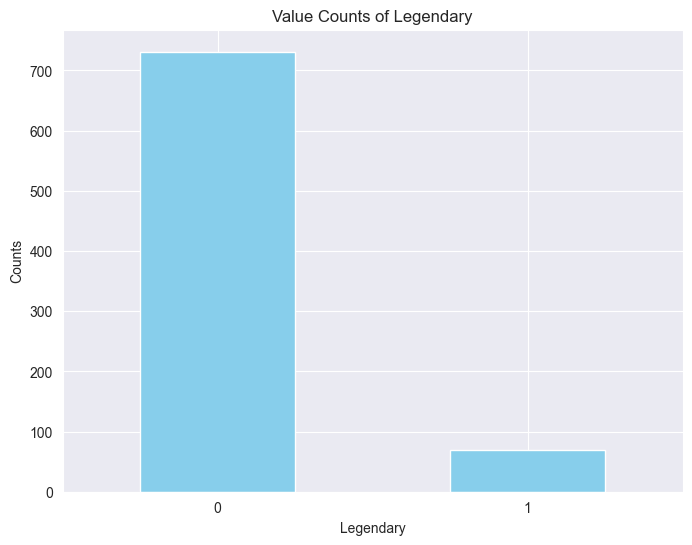

In [162]:
plt.figure(figsize=(8, 6))
categorical_one.plot(kind='bar', color='skyblue')
plt.xlabel('Legendary')
plt.ylabel('Counts')
plt.title('Value Counts of Legendary')
plt.xticks(rotation=0)
plt.show()

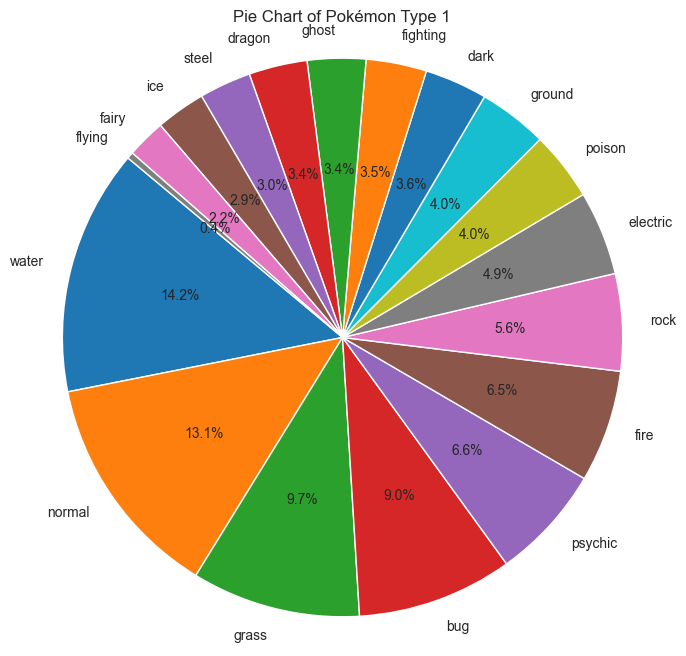

In [163]:
# Pie chart
plt.figure(figsize=(8, 8))
type1_counts = df['type1'].value_counts()
plt.pie(type1_counts, labels=type1_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Pokémon Type 1')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### Descriptive Statistics of at least 4 numerical variables

Descriptive Statistics is used to see how spread out the numeric data is.

In [164]:
numerical_variables = ['sp_attack', 'sp_defense', 'speed', 'defense']

numerical_df = df[numerical_variables]

numerical_df.describe()

,sp_attack,sp_defense,speed,defense
count,801.000000,801.000000,801.000000,801.000000
mean,71.305868,70.911361,66.334582,73.008739
std,32.353826,27.942501,28.907662,30.769159
min,10.000000,20.000000,5.000000,5.000000
25%,45.000000,50.000000,45.000000,50.000000
50%,65.000000,66.000000,65.000000,70.000000
75%,91.000000,90.000000,85.000000,90.000000
max,194.000000,230.000000,180.000000,230.000000


### Two visualizations representing digital variables
We chose sp_attack and speed digital variables for visualizations.We can run loop for all digital variables if we want.For Visulaization, we used histogram and density plot.

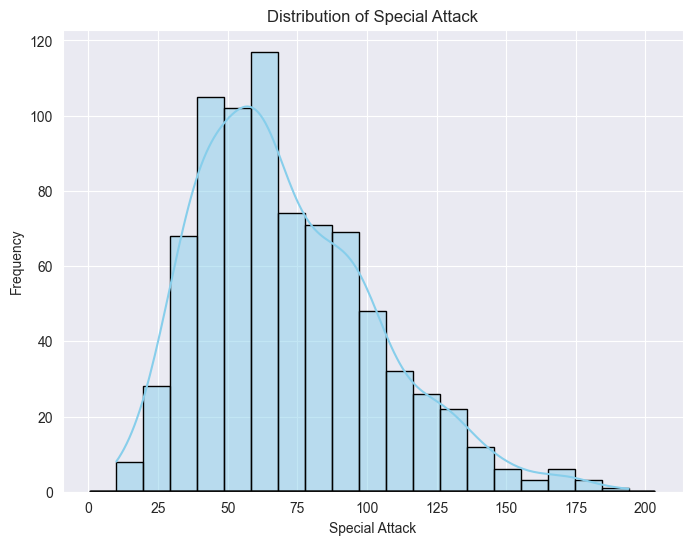

In [165]:
plt.figure(figsize=(8, 6))
sns.histplot(df['sp_attack'], kde=True, color='skyblue', edgecolor='black')
plt.xlabel('Special Attack')
plt.ylabel('Frequency')
plt.title('Distribution of Special Attack')

# Adding a normal distribution curve based on the mean and standard deviation
mean_attack = np.mean(df['sp_attack'])
std_attack = np.std(df['sp_attack'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_attack, std_attack)
plt.plot(x, p, 'k', linewidth=2)

plt.show()

# This is also done to observe the spread of data but this is more graphic.
# The bell shape denotes, how close values are to the mean in this case its 50 - 75, and it mimics the standard bell shape this indicates values are less spread. The towers outside bell shape are outliers, explained later in this notebook,

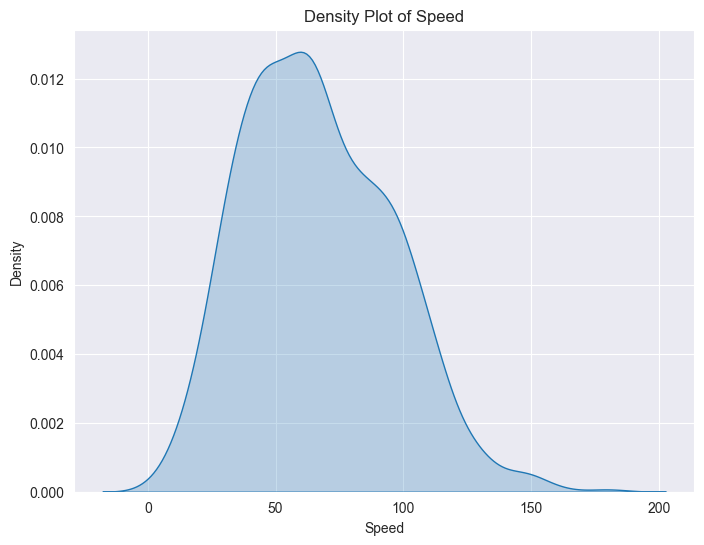

In [166]:
import seaborn as sns

# Density plot (Kernel Density Estimate)
plt.figure(figsize=(8, 6))
sns.kdeplot(df['speed'], fill=True)
plt.title('Density Plot of Speed')
plt.xlabel('Speed')
plt.ylabel('Density')
plt.show()

#   Multivariable Analysis


### For Categorical variables
Previously we didn't take into account the relationship between numeric and categorical variables.
we treated each variable as its own entity but here what we are doing is,
we want to test both of them simultaneously to determine relationship.

### Two visualizations presenting two numerical variables


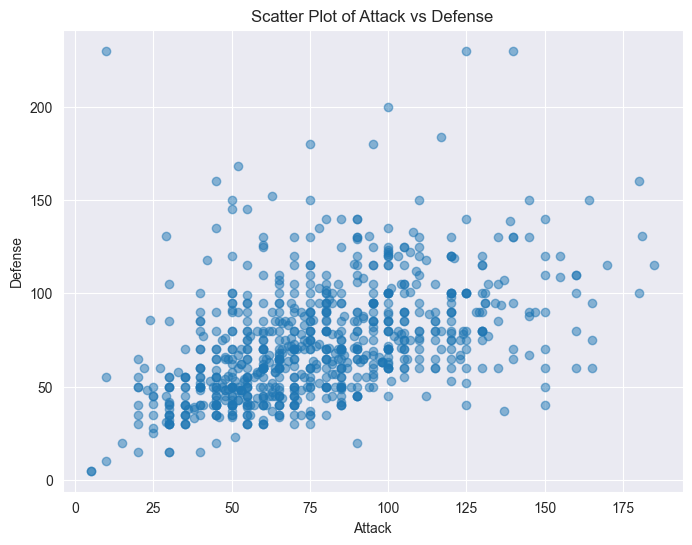

In [167]:
# We are using Scatter plot and Histogram to find relationship between two variables
plt.figure(figsize=(8, 6))
plt.scatter(df['attack'], df['defense'], alpha=0.5)
plt.title('Scatter Plot of Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.grid(True)
plt.show()

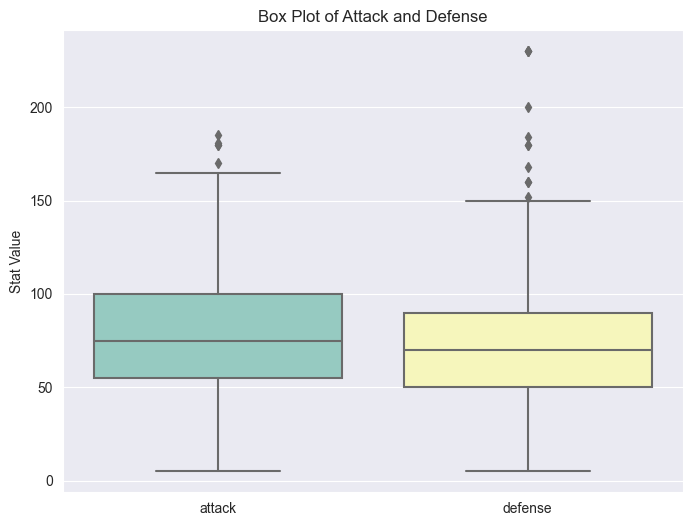

In [169]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['attack', 'defense']], palette="Set3")
plt.title('Box Plot of Attack and Defense')
plt.ylabel('Stat Value')
plt.show()

### Two Visualizations Presenting Two Categorical Variables
We are using type1 and type2 variables and for this we used Grouped Bar Plot and HeatMap

<Figure size 1200x600 with 0 Axes>

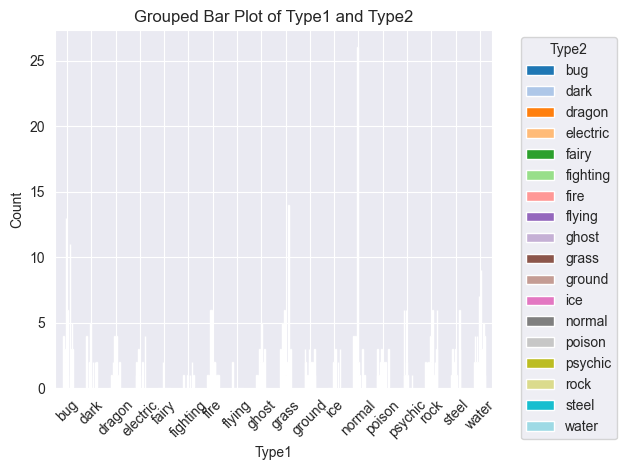

In [171]:
type_counts = df.groupby(['type1', 'type2']).size().unstack(fill_value=0)

# Plot the grouped bar plot
plt.figure(figsize=(12, 6))
type_counts.plot(kind='bar', cmap='tab20')
plt.title('Grouped Bar Plot of Type1 and Type2')
plt.xlabel('Type1')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Type2', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

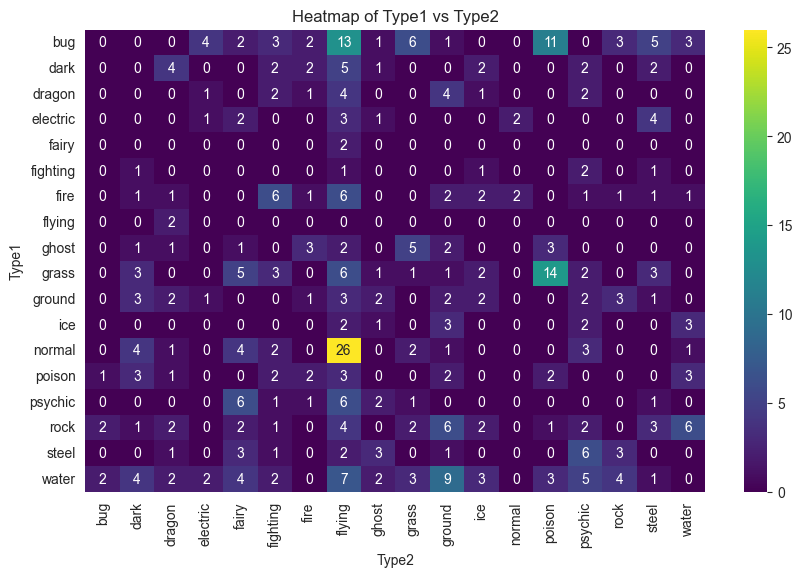

In [172]:
# Create a pivot table with counts of Pokémon for each unique combination of Type1 and Type2
pivot_table = df.pivot_table(index='type1', columns='type2', aggfunc='size', fill_value=0)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt='g')
plt.title('Heatmap of Type1 vs Type2')
plt.xlabel('Type2')
plt.ylabel('Type1')
plt.show()

### Two visualizations presenting a categorical variable and a numerical Variable
We used base_happiness and sp_attack.We are using ViolinPlot and BoxPlot for this

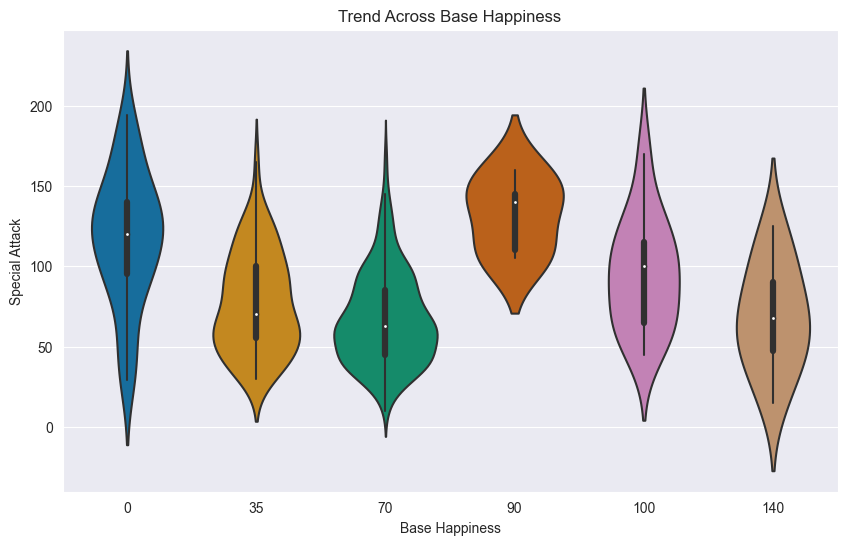

In [173]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='base_happiness', y='sp_attack', data=df, palette='colorblind')
plt.xlabel('Base Happiness')
plt.ylabel('Special Attack')
plt.title('Trend Across Base Happiness')
plt.xticks(rotation=0)
plt.show()
# The thickness in the middle shows, where most values lie for eg for most cases in base happiness 0 special attack values are 100 - 150

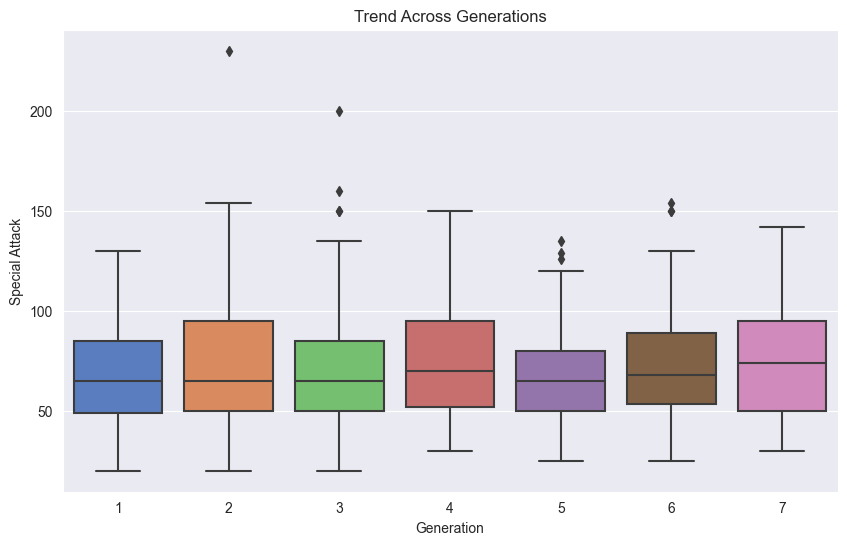

In [174]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='generation', y='sp_defense', data=df, palette='muted')
plt.xlabel('Generation')
plt.ylabel('Special Attack')
plt.title('Trend Across Generations')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Same explaination as above, but you probabliy observed dots, they are called outliers, they show exceptional cases.

#  Correlation Analysis


### Explore correlations between numerical variables using a correlation matrix

In [183]:
# Feature I want to include in my correlation heatmap
numerical_features = ['against_bug', 'against_dark', 'against_dragon',
       'against_electric', 'against_fairy', 'against_fight', 'against_fire',
       'against_flying', 'against_ghost', 'against_grass', 'against_ground',
       'against_ice', 'against_normal', 'against_poison', 'against_psychic',
       'against_rock', 'against_steel', 'against_water']

correlation_matrix = df[numerical_features].corr()
correlation_matrix


,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water
against_bug,1.000000,0.230107,0.165430,-0.246943,0.239566,0.137902,0.202778,0.183343,0.129174,0.079197,-0.186841,0.148176,0.215589,0.354255,-0.463272,-0.210522,0.055504,-0.254732
against_dark,0.230107,1.000000,0.140830,-0.015830,-0.301354,-0.357981,0.010527,-0.179697,0.672337,-0.006533,-0.007660,-0.010763,-0.413632,-0.236919,-0.230415,0.011963,-0.119758,-0.001976
against_dragon,0.165430,0.140830,1.000000,-0.108928,0.439705,0.035237,-0.261570,0.064850,-0.049941,-0.037135,-0.120042,0.350048,0.142035,-0.210199,0.100153,0.090184,-0.227697,-0.096549
against_electric,-0.246943,-0.015830,-0.108928,1.000000,-0.089864,-0.102798,-0.279029,-0.111461,-0.073031,0.056209,-0.269444,-0.328531,0.076699,-0.015769,-0.017592,0.417261,-0.187543,-0.297600
against_fairy,0.239566,-0.301354,0.439705,-0.089864,1.000000,0.157712,-0.169489,0.199862,-0.120806,0.052899,-0.256504,0.273650,0.149488,0.146464,-0.145238,-0.205444,0.130323,-0.218937
against_fight,0.137902,-0.357981,0.035237,-0.102798,0.157712,1.000000,-0.076480,-0.318941,-0.546982,0.269157,0.358793,-0.220239,-0.006997,-0.189798,-0.264938,-0.240964,0.165066,0.205249
against_fire,0.202778,0.010527,-0.261570,-0.279029,-0.169489,-0.076480,1.000000,0.528127,0.050570,-0.463634,-0.260766,0.186361,-0.055106,0.184334,-0.018519,0.120747,0.115992,-0.242635
against_flying,0.183343,-0.179697,0.064850,-0.111461,0.199862,-0.318941,0.528127,1.000000,0.013204,-0.358467,-0.465010,0.277935,0.266780,0.484843,0.375023,0.161885,0.001264,-0.311997
against_ghost,0.129174,0.672337,-0.049941,-0.073031,-0.120806,-0.546982,0.050570,0.013204,1.000000,0.029542,0.093727,-0.052531,-0.404780,-0.105137,-0.084496,-0.061013,-0.002008,0.009046
against_grass,0.079197,-0.006533,-0.037135,0.056209,0.052899,0.269157,-0.463634,-0.358467,0.029542,1.000000,0.195064,-0.239682,-0.127550,-0.221946,-0.093657,-0.375177,0.082812,0.229968


### Make this visualization more pleasant and “Visual” thanks to a “Heatmap”


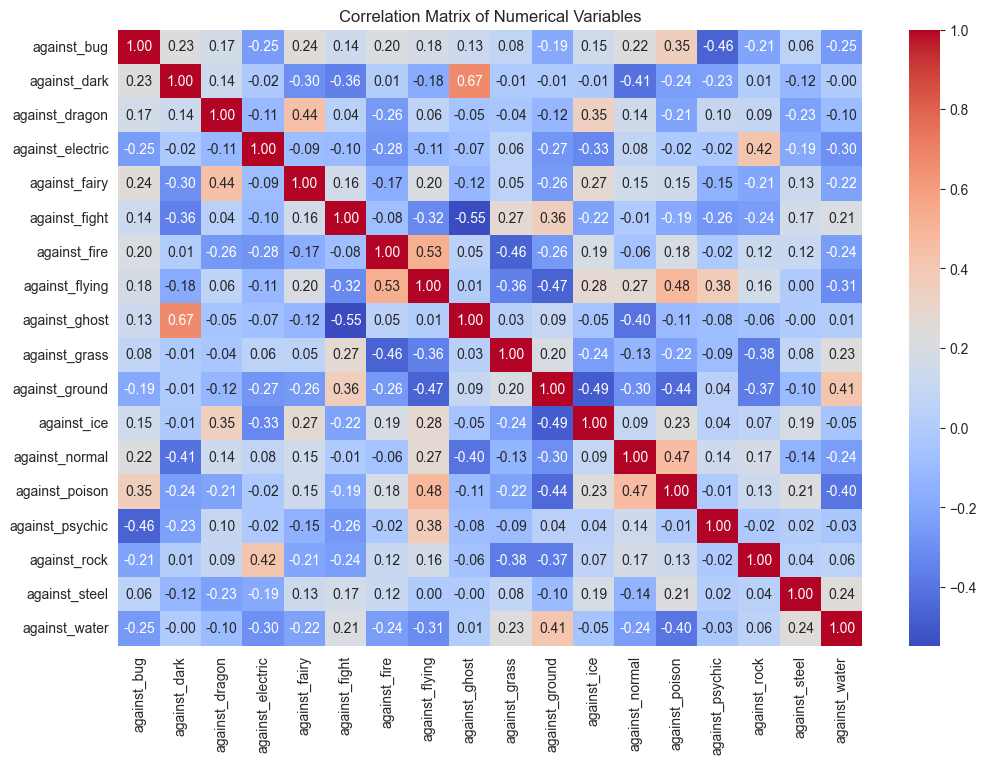

In [184]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

### Which variables are most correlated in the dataframe?

In [187]:
# Finding most correlated variables
highest_correlations = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated = highest_correlations[(highest_correlations < 1) & (highest_correlations.abs() >= 0.5)].head(5)
print("Most correlated variables:")
print(most_correlated)

Most correlated variables:
against_ghost   against_dark      0.672337
against_dark    against_ghost     0.672337
against_fire    against_flying    0.528127
against_flying  against_fire      0.528127
against_fight   against_ghost    -0.546982
dtype: float64


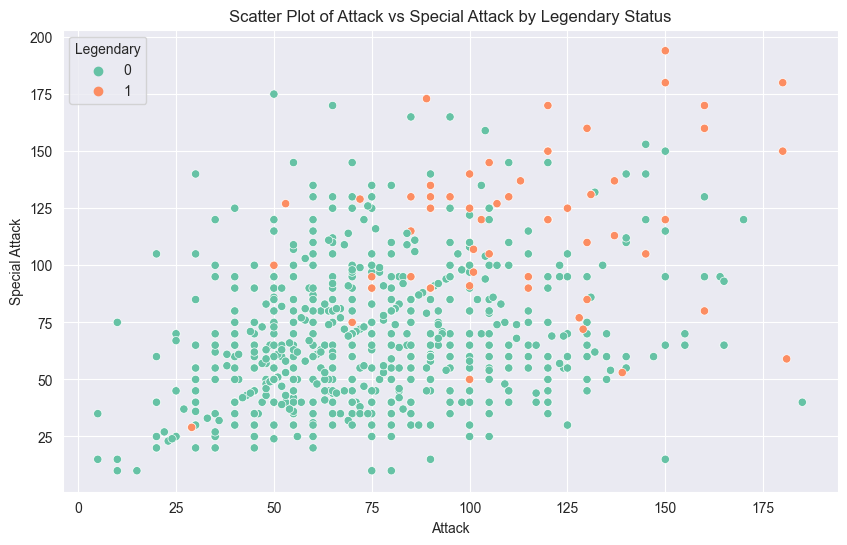

In [177]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='attack', y='sp_attack', data=df, hue='is_legendary', palette='Set2')
plt.title('Scatter Plot of Attack vs Special Attack by Legendary Status')
plt.xlabel('Attack')
plt.ylabel('Special Attack')
plt.legend(title='Legendary', loc='upper left')
plt.show()

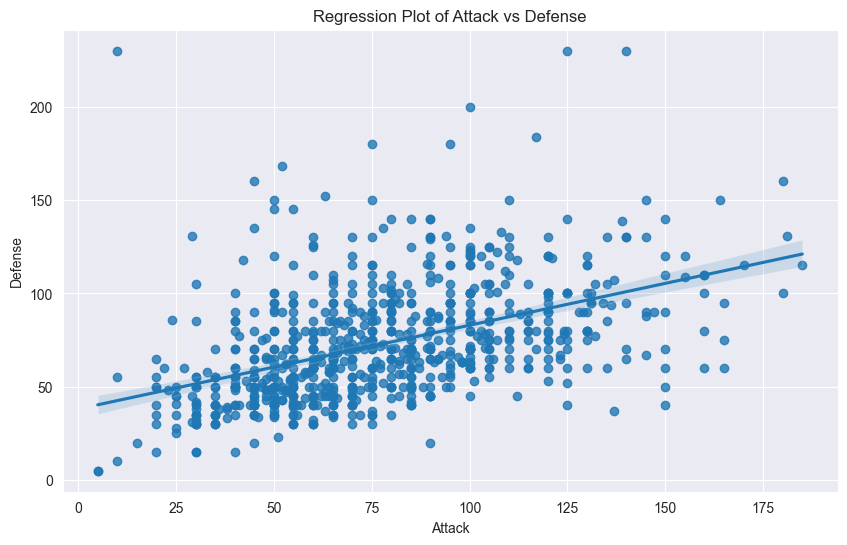

In [178]:
plt.figure(figsize=(10, 6))
sns.regplot(x='attack', y='defense', data=df)
plt.title('Regression Plot of Attack vs Defense')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

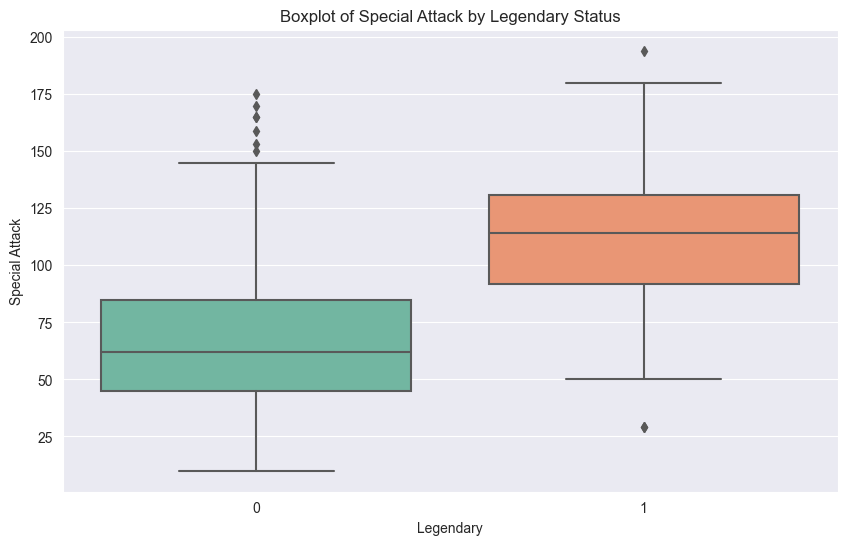

In [127]:
# Comparative distributions in relation to a categorical variable
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_legendary', y='sp_attack', data=df, palette='Set2')
plt.title('Boxplot of Special Attack by Legendary Status')
plt.xlabel('Legendary')
plt.ylabel('Special Attack')
plt.show()

In [180]:
# Bonus: Chi-square test of independence for categorical variables
chi2, p, dof, expected = chi2_contingency(pd.crosstab(df['type1'], df['is_legendary']))
print("Chi-square value:", chi2)
print("P-value:", p)

Chi-square value: 73.90834615654452
P-value: 4.532581978427346e-09
